In [1]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

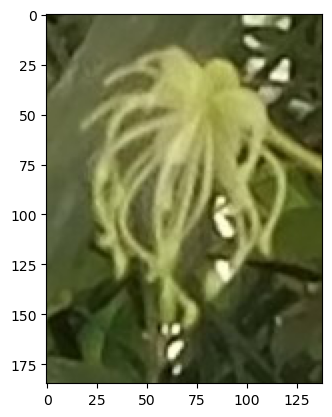

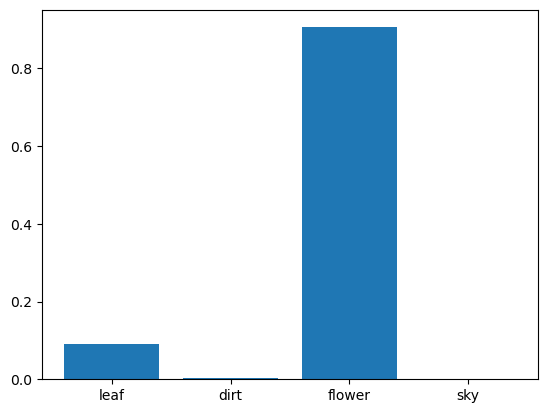

In [5]:
import os
import matplotlib.pyplot as plt

directory_path = R"C:\Users\duker\Documents\id_from_image\clip_test_images"
image_basename = "vine_flower.JPG"
# image_basename = "vine_leaf.JPG"
# image_basename = "P0800374.JPG"
# image_basename = "orange_maple.JPG"

image_path = os.path.join(directory_path, image_basename)

labels = ["leaf", "dirt", "flower", "sky"]

with Image.open(image_path) as image:
    plt.imshow(image)
    plt.show()
    inputs = processor(text=labels, images=image, return_tensors="pt")

    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

    np_probs = probs.squeeze().detach().numpy()
    plt.bar(labels, np_probs)